# <a id='toc1_'></a>[Rapport sur les methodes de calcul de Chimie Quantique (Hatree Fock et Post Hatree)](#toc0_)

1. **F. M. FENGA**, franklin.fenga@facsciences-uy1.cm
    * Etudiant en Master 2 , Physique Atomique, Moleculaire et Biophysique, Université de Yaoundé I

       
February 2025

## Introduction
Le thiophène est une molécule organosulfurée constituée d'un cycle de cinq atomes avec quatre atomes de carbone et un atome de soufre. C'est un composé aromatique largement étudié en chimie organique en raison de ses propriétés intéressantes et de ses applications diverses. Dans ce rapport, nous allons explorer les propriétés du thiophène en utilisant les outils RDKit et réaliser des calculs HF, DFT et post-HF avec PySCF. 

## Présentation de la molécule de Thiophène

### Description
La molécule de thiophène [PubChem](https://pubchem.ncbi.nlm.nih.gov/compound/Thiophene)
* **Formule brute** : `C4H4S`
* **PubChem Cid** : `8030`
* **Nom IUPAC** : `Thiophene`
* **Masse molaire** : `84,14 g/mol`
* **Isometric SMILES** : `C1=CSC=C1`

Le thiophène est une molécule organique hétérocyclique constituée d'un cycle de cinq atomes, comprenant quatre atomes de carbone et un atome de soufre. Sa formule chimique est C4H4S.

Structurellement, le thiophène peut être représenté comme un cycle plan avec un atome de soufre alternant avec les atomes de carbone. Cette alternance crée une conjugaison des doubles liaisons à travers l'anneau.

Le thiophène présente des propriétés aromatiques dues à la délocalisation des électrons pi dans l'anneau, ce qui lui confère une stabilité particulière. Il est souvent comparé au benzène, mais avec un atome de soufre à la place d'un des atomes de carbone, ce qui modifie légèrement ses propriétés chimiques et physiques.

En raison de la polarité induite par le soufre, le thiophène peut interagir de manière unique avec d'autres molécules et solvants, offrant des opportunités d'application dans divers domaines tels que la pharmacie, les matériaux conducteurs et la chimie industrielle.




### Intérêt

Le thiophène est une molécule d'intérêt dans divers domaines de la chimie et de la biologie en raison de ses propriétés uniques. Voici quelques-uns des intérêts associés à cette molécule :

* `Chimie organique` : Le thiophène est utilisé comme motif structurel dans le développement de nombreux composés organiques. Sa présence confère souvent des propriétés spécifiques aux molécules, telles que des activités biologiques ou des interactions spécifiques avec d'autres molécules.

* `Pharmacologie` : De nombreux composés dérivés du thiophène ont montré des activités pharmacologiques intéressantes. Certains d'entre eux sont utilisés comme médicaments ou sont étudiés pour leur potentiel thérapeutique dans le traitement de diverses maladies, comme le cancer, les infections bactériennes ou les maladies neurodégénératives.

* `Agriculture` : Certains dérivés du thiophène sont utilisés en agriculture comme agents de protection des cultures. Ces composés peuvent avoir des propriétés fongicides ou insecticides, aidant ainsi à prévenir les maladies des plantes et les infestations d'insectes nuisibles.

* `Chimie des matériaux` : Le thiophène et ses dérivés sont également utilisés dans la synthèse de matériaux polymères. Ces polymères peuvent présenter des propriétés intéressantes, telles que la conductivité électrique ou la capacité d'absorber la lumière, ce qui les rend utiles dans des applications telles que les cellules solaires, les capteurs ou les dispositifs électroniques.


## Présentation des propriétés de la molécule de Thiophène en utilisant RDKit

In [1]:
#importation des packages  rdkit et temps
import time
from rdkit import Chem

#### **Création `RDKit` d'un objet moléculaire**

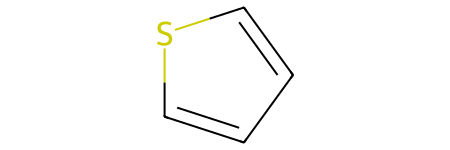

In [2]:
# Convertir le SMILES en objet RDKit Mol
smiles = "C1=CSC=C1"  # https://pubchem.ncbi.nlm.nih.gov/compound/Thiophene
smi_key = 'Thiophene'

# Définir une molécule à partir de sa chaîne SMILES
mol_rdkit = Chem.MolFromSmiles(smiles)
mol_rdkit


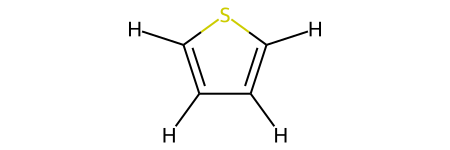

In [3]:
mol_rdkit = Chem.AddHs(mol_rdkit)
mol_rdkit

### Propriétés physico-chimique

In [4]:
import os
import pandas as pd
from rdkit.Chem import Descriptors
properties = ['Poids_Mol','poids_mol_moy', 'LogP', 'TPSA','hbd','hba']

# Calcul des descripteurs
#poid_moleculaire
molwt = Descriptors.MolWt(mol_rdkit)
#poid moleculaire moyen
molwtE = Descriptors.ExactMolWt(mol_rdkit)
# solubilite
logp = Descriptors.MolLogP(mol_rdkit)
#polarite
tpsa = Descriptors.TPSA(mol_rdkit)
#nombre de liasons donneurs d'H
hbd = Descriptors.NumHDonors(mol_rdkit)
#nombre de liason accepteurs d'H
hba = Descriptors.NumHAcceptors(mol_rdkit)

# Ajout des propriétés à la liste de données
data=[molwt , molwtE, logp, tpsa,hbd,hba]
data1=[84.14  ,84.00337130  ,1.81, 41.1 ,0,1]

df_HF = pd.DataFrame({"properties ":properties, 
                      'valeurs':data,
                      "valeurs_pupchem":data1})
df_HF.set_index("properties ", inplace=True)### <a id='toc1_3_'></a>[CONSIGNE](#toc0_)

df_HF

,valeurs,valeurs_pupchem
properties,,
Poids_Mol,84.143000,84.140000
poids_mol_moy,84.003371,84.003371
LogP,1.748100,1.810000
TPSA,0.000000,41.100000
hbd,0.000000,0.000000
hba,1.000000,1.000000


Les informations présentes dans le DataFrame Pandas sont :

* **Poids_Mol** : Il s'agit du poids moléculaire de la molécule, exprimé en grammes par mole (g/mol). C'est la masse totale de la molécule qui est de 84.14 g/mol, ce qui est équivalent à celle de PubChem estimée à 84.14 g/mol.

* **poids_mol_moy** : Il s'agit du poids moléculaire moyen, calculé en prenant en compte la distribution isotopique des atomes. La valeur est de 84.00337130 g/mol, qui est légèrement différente du poids moléculaire brut.

* **LogP** : Il s'agit du coefficient de partage octanol/eau (logP) de la molécule. Un coefficient de partage octanol/eau (logP) de 1.81 suggère une légère hydrophobicité (tendance d'une substance à repousser ou à éviter l'eau) pour la molécule, ce qui est l'aptitude de la molécule à traverser les membranes biologiques.

* **TPSA** : Il s'agit de la surface polaire totale (Total Polar Surface Area) de la molécule, exprimée en Å² (angstroms carrés). C'est une mesure de la surface de la molécule qui est polaire et capable d'interactions avec des solvants polaires. Sa valeur ici est de 41.1 Å².

* **hbd** : Il s'agit du nombre de donneurs de liaisons hydrogène (hydrogen bond donors) dans la molécule. Cela compte le nombre d'atomes d'hydrogène liés à des atomes d'oxygène, d'azote ou de soufre, qui peuvent former des liaisons hydrogène. Dans le cas de la molécule de thiophène, les atomes d'hydrogène n'ont que des liaisons avec les atomes de carbone, donc la valeur de hbd est 0.

* **hba** : Il s'agit du nombre d'accepteurs de liaisons hydrogène (hydrogen bond acceptors) dans la molécule. Cela compte le nombre d'atomes d'oxygène, d'azote ou de soufre dans la molécule, qui peuvent accepter des liaisons hydrogène. Dans notre molécule, nous avons uniquement un atome de soufre, d'où la valeur de hba est 1.


### Structure 3D

In [5]:
import pyscf

pyscf.__version__

'2.8.0'

In [6]:
with open('molecules_xyz.txt', 'r') as source_file:
    # Lire le contenu du fichier source ligne par ligne
    lines = source_file.readlines()
    
    # Extraire les lignes souhaitées
    extracted_lines = lines[80:90]  # Exemple : extraire les lignes 3 à 5
    
# Ouvrir le fichier de destination en écriture
with open('Tiophene.txt', 'w') as destination_file:
    # Écrire les lignes extraites dans le fichier de destination
    for line in extracted_lines:
        destination_file.write(line)

In [7]:

from pyscf import gto
import py3Dmol

with open('Tiophene.txt', 'r') as file:
    lines = file.readlines()[1:] 
    mol_xyz = ''.join(lines).strip()

mol = gto.M(
    atom=mol_xyz, 
    basis="cc-pVDZ", # choix de la base 
    verbose=4,
    charge=0,      # 0 par défaut
    spin=0,        # 0 par défaut, défini comme (n_up - n_down)
    symmetry=True, # False par défaut
)


# 3D representation
xyz_view = py3Dmol.view(width=300,height=300)
xyz_view.addModel(mol.tostring(format="xyz"),'xyz')
xyz_view.setStyle({'stick':{}})
xyz_view.zoomTo()
xyz_view.show()


System: uname_result(system='Linux', node='marshall-HP-ProBook-455-G8-Notebook-PC', release='6.8.0-51-generic', version='#52-Ubuntu SMP PREEMPT_DYNAMIC Thu Dec  5 13:09:44 UTC 2024', machine='x86_64')  Threads 12
Python 3.11.7 (main, Dec 15 2023, 18:12:31) [GCC 11.2.0]
numpy 1.26.4  scipy 1.11.4  h5py 3.9.0
Date: Sun Feb 23 00:04:34 2025
PySCF version 2.8.0
PySCF path  /home/marshall/anaconda3/lib/python3.11/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 9
[INPUT] num. electrons = 44
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry True subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C      1.226800000000   0.146600000000   0.000000000000 AA    2.318316009616   0.277033849861   0.000000000000 Bohr   0.0
[INPUT]  2 C      0.919900000000  -1.184200000000   0.000000000000 AA    1.73

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
# creation de l'objet mol.
mol.build()

print(f'Le nombre total d\'électrons est {mol.nelectron} et le nombre total d\'électrons (alpha, béta) est {mol.nelec}')
print(f'Le nombre d\'orbitales atomiques, dans la base {mol.basis}, est {mol.nao_nr()}')
print(f'L\'énergie nucléaire vaut {mol.energy_nuc()} Hartrees')

### Calcul  Hartree Fock et DFT

- **Cacul Hatree Fock**

#### <a id='toc1_4_2_'></a>[Création d'un objet mean-field (mf) avec (`scf.RHF(Restricted Hartree – Fock)`)](#toc0_)

In [9]:
from pyscf import scf

mf = scf.RHF(mol) # Create a PySCF HF mean-field object
mf.x2c().density_fit() # To speed up calculations
mf.run()



******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp6gxuj7in
max_memory 4000 MB (current use 262 MB)
Freeze 0 electrons in irreps []
    44 free electrons in irreps A' A"
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -552.675417259048
HOMO (A") = -0.209046814314051  LUMO (A") = 0.0422897016538656
cycle= 1 E= -551.263381273686  delta_E= 1.41  |g|= 0.364  |ddm|= 2.95
HOMO (A") = -0.358283921854614  LUMO (A") = 0.0984112891236539
cycle= 2 E= -551.313552490765  delta_E= -0.0502  |g|= 0.136  |ddm|= 0.493
HOMO (A") = -0.315604264855824  LUMO (A") = 0.132127103863036
cycle= 3 E= -551.319124531627  delta_E= -0.00557  |g|= 0.0574  |ddm|= 0.1

- **Calcul DFT**
  
Ici, nous effectuons le calcul pour différentes fonctionnelles dans le but d'identifier la mieux adapter pour notre molécule. 

les fonctionnelles utilisées seront **B3LYP**, **B3PW91**, **BLYP**, **B1B95**

In [10]:
#B3LYP
# Initialize the dictionary to store the energies and reference values
from pyscf import dft

start = time.time()
mdf=dft.RKS(mol, xc="B3LYP").run() 
mdf_time = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpfpr8423v
max_memory 4000 MB (current use 364 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B3LYP
    P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x72b79215a660>
grids dens level: 3
symmetrized grids: True
atomic radii adjust function: <fu

/home/marshall/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:512: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


tot grids = 114584
init E= -553.811235114917
HOMO (A") = -0.274489078244764  LUMO (A") = -0.0828366386883128
cycle= 1 E= -553.000485040261  delta_E= 0.811  |g|= 0.329  |ddm|= 3.16
HOMO (A") = -0.186944382251093  LUMO (A") = 0.0276007472174611
cycle= 2 E= -552.965101902998  delta_E= 0.0354  |g|= 0.479  |ddm|= 0.803
HOMO (A") = -0.234090276067275  LUMO (A") = -0.00700485457678856
cycle= 3 E= -553.029788574695  delta_E= -0.0647  |g|= 0.0781  |ddm|= 0.561
HOMO (A") = -0.240425782999857  LUMO (A") = -0.0143680880853805
cycle= 4 E= -553.031569088058  delta_E= -0.00178  |g|= 0.0278  |ddm|= 0.113
HOMO (A") = -0.238054945842206  LUMO (A") = -0.0125389300366192
cycle= 5 E= -553.031759124066  delta_E= -0.00019  |g|= 0.00876  |ddm|= 0.0288
HOMO (A") = -0.238361182461748  LUMO (A") = -0.0124240075046361
cycle= 6 E= -553.031779215269  delta_E= -2.01e-05  |g|= 0.00217  |ddm|= 0.00934
HOMO (A") = -0.238336674973534  LUMO (A") = -0.0124464239893141
cycle= 7 E= -553.031780453041  delta_E= -1.24e-06  |g|

In [11]:
#B3PW91
# Initialize the dictionary to store the energies and reference values
from pyscf import dft

start = time.time()
mdf=dft.RKS(mol, xc="B3PW91").run() 
mdf1_time = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpz0alll97
max_memory 4000 MB (current use 502 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B3PW91
    A. D. Becke.,  J. Chem. Phys. 98, 5648 (1993)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x72b79215a660>
grids dens level: 3
symmetrized grids: True
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x72b79215a5c0>

In [12]:
#B1B95
# Initialize the dictionary to store the energies and reference values
from pyscf import dft

start = time.time()
mdf=dft.RKS(mol, xc="B1B95").run() 
mdf3_time = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp71woyqml
max_memory 4000 MB (current use 508 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B1B95
    A. D. Becke.,  J. Chem. Phys. 104, 1040 (1996)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x72b79215a660>
grids dens level: 3
symmetrized grids: True
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x72b79215a5c0>

In [13]:
#BLYP
# Initialize the dictionary to store the energies and reference values
from pyscf import dft

start = time.time()
mdf=dft.RKS(mol, xc="BLYP").run() 
mdf2_time = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmptfxs1oao
max_memory 4000 MB (current use 523 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = BLYP
    A. D. Becke.,  Phys. Rev. A 38, 3098 (1988)
    C. Lee, W. Yang, and R. G. Parr.,  Phys. Rev. B 37, 785 (1988)
    B. Miehlich, A. Savin, H. Stoll, and H. Preuss.,  Chem. Phys. Lett. 157, 200 (1989)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune

In [14]:
mf_times = [mdf_time, mdf1_time, mdf2_time, mdf3_time]
energies = [-552.9267148,-552.9267148,-552.9378536,-552.9949585]
ref_energies=[-553.0325426,-552.9273649,-552.9399380,-552.9970779]
ecart_energies=[(-552.9267148 + 553.0325426)*627.5095,(-552.9267148 + 552.9273649)*627.5095,(-552.9399380 + 552.9399380)*627.5095,(-552.9970779+ 552.9970779)*627.5095]

In [15]:
# Create the results dataframe
import pandas as pd
# Define the calculation methods
fonc = ['B3LYP', 'B3PW91', 'BLYP', 'B1B95']
df_HF = pd.DataFrame({"Fonctionnelle":fonc, 
                      'Total energy':energies,
                      "Reference energy":ref_energies,
                      "ecart_ref_tot(kcal/mol)":ecart_energies,
                      "Time":mf_times})

df_HF

,Fonctionnelle,Total energy,Reference energy,ecart_ref_tot(kcal/mol),Time
0,B3LYP,-552.926715,-553.032543,66.407950,5.499245
1,B3PW91,-552.926715,-552.927365,0.407944,5.491601
2,BLYP,-552.937854,-552.939938,0.000000,5.998571
3,B1B95,-552.994959,-552.997078,0.000000,6.543699


### Comparaison des fonctionnelles

Parmi les fonctionnelles étudiées, **BLYP et B1B95 offrent la meilleure précision** avec un écart nul par rapport à l’énergie de référence. Cependant, **B1B95 est la plus lente (8.03 min), tandis que BLYP est plus rapide (6.83 min)**, ce qui en fait une option optimale. **B3PW91 se distingue par sa rapidité (5.76 min) tout en maintenant un faible écart de 0.41 kcal/mol**, ce qui en fait un bon compromis entre précision et performance. En revanche, **B3LYP est la moins performante**, affichant un écart important de 66.41 kcal/mol malgré un temps de calcul raisonnable. Ainsi, **BLYP apparaît comme la meilleure option**, combinant exactitude et rapidité.


#### <a id='toc1_1_'></a>[Calcul Post Hatree(MP2, CCSD et CCSD(T)](#toc0_)
#### <a id='toc1_1_'></a>[Calcule du MF (mean field)](#toc0_)

In [16]:
import time
from pyscf import scf

start = time.time()
myhf = scf.RHF(mol).run()
myhf_time = time.time() - start 



******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpntefq292
max_memory 4000 MB (current use 523 MB)
Freeze 0 electrons in irreps []
    44 free electrons in irreps A' A"
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -552.675417259048
HOMO (A") = -0.209046814314051  LUMO (A") = 0.0422897016538583
cycle= 1 E= -551.263381273686  delta_E= 1.41  |g|= 0.364  |ddm|= 2.95
HOMO (A") = -0.358283921854604  LUMO (A") = 0.0984112891236637
cycle= 2 E= -551.313552490764  delta_E= -0.0502  |g|= 0.136  |ddm|= 0.493
HOMO (A") = -0.315604264855825  LUMO (A") = 0.132127103863031
cycle= 3 E= -551.319124531629  delta_E= -0.00557  |g|= 0.0574  |ddm|= 0.1

#### <a id='toc1_1_'></a>2.2.2[Calcule du MP2(Møller-Plesset ) ](#toc0_)
La [MP2](https://en.wikipedia.org/wiki/M%C3%B8ller%E2%80%93Plesset_perturbation_theory) effectue des corrections perturbatives de l'approximation Hartree-Fock.

In [17]:
from pyscf import mp
start = time.time()
mymp2 = mp.MP2(myhf).run()
mymp2_time = time.time() - start +  myhf_time
energie1=mymp2.e_tot
print(energie1)


******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 22, nmo = 94
max_memory 4000 MB (current use 603 MB)
E(MP2) = -552.00005310868  E_corr = -0.679634478982428
E(SCS-MP2) = -551.979163403239  E_corr = -0.6587447735416
E_corr(same-spin) = -0.1809422321969
E_corr(oppo-spin) = -0.498692246785528
-552.00005310868


* `E(MP2) = -552.00005310868 ` : C'est l'énergie totale calculée avec la méthode `MP2`. Cette énergie inclut à la fois l'énergie d'électronélectron de `Hartree-Fock (HF)` et la correction de corrélation électronique de deuxième ordre `(MP2)`. La valeur négative indique que le système moléculaire est lié et stable.

* `E_corr = -0.679634478982428` : C'est la correction de corrélation électronique calculée avec la méthode `MP2`. Elle représente la différence entre l'énergie totale calculée avec `MP2` et l'énergie d'électronélectron calculée avec `HF`. La valeur négative indique que la correction de corrélation électronique est stabilisante, c'est-à-dire qu'elle améliore l'approximation HF en prenant en compte les effets de corrélation électronique supplémentaires.

* `E(SCS-MP2) = -551.979163403239` : C'est l'énergie totale calculée avec la méthode `SCS-MP2`. `SCS-MP2` est une version modifiée de `MP2` qui utilise des coefficients d'échelle spécifiques pour améliorer la description de la corrélation électronique. La valeur négative indique que le système moléculaire est lié et stable.

* `E_corr = -0.6587447735416 `: C'est la correction de corrélation électronique calculée avec la méthode `SCS-MP2`. Elle représente la différence entre l'énergie totale calculée avec `SCS-MP2` et l'énergie d'électronélectron calculée avec `HF`. Comme pour `MP2`, la valeur négative indique que la correction de corrélation électronique est stabilisante.

#### <a id='toc1_1_'></a>[Calcule du  CCSD avec CC](#toc0_)
* La [CC(Coupled_cluster)](https://en.wikipedia.org/wiki/Coupled_cluster) est une méthode perturbative qui améliore l'approximation de Hartree-Fock.

In [18]:
from pyscf import cc

start = time.time()
mycc = cc.CCSD(myhf).run()
mycc_time = time.time() - start +myhf_time
energie2=mycc.e_tot
print(energie2)


******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 22, nmo = 94
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 603 MB)
Init t2, MP2 energy = -552.000053058121  E_corr(MP2) -0.679634428423411
Init E_corr(CCSD) = -0.679634428428369
cycle = 1  E_corr(CCSD) = -0.687274847780066  dE = -0.00764041935  norm(t1,t2) = 0.0714046
cycle = 2  E_corr(CCSD) = -0.707421064295973  dE = -0.0201462165  norm(t1,t2) = 0.0246233
cycle = 3  E_corr(CCSD) = -0.708606481817328  dE = -0.00118541752  norm(t1,t2) = 0.0113657
cycle = 4  E_corr(CCSD) = -0.711487966631443  dE = -0.00288148481  norm(t1,t2) = 0.00502925
cycle = 5  E_corr(CCSD) = -0.711621038405093  dE = -0.000133071774  norm(t1,t2) = 0.0014509
cycle = 6  E_corr(CCSD) = -0.711407602645422  dE = 0.00021343576  norm(t1,t2) = 0.000523901
cycle = 7  E_corr(CCSD) = -0.711406874275872  dE = 7.2836955e-07  norm(t1,t2) = 0.00024

* `E_corr = -0.7114152407486781`:  Elle représente la différence entre l'énergie totale calculée avec `CCSD` et l'énergie d'électron électron calculée avec `HF`. La valeur négative indique que la correction de corrélation électronique est stabilisante, c'est-à-dire qu'elle améliore l'approximation HF en prenant en compte les effets de corrélation électronique supplémentaires.

#### <a id='toc1_1_'></a>[ Calcul du  CCSD(T) avec CCSD](#toc0_)

In [19]:
start = time.time()
e_ccsd_t = mycc.ccsd_t()
mycct_time = time.time() - start + myhf_time

CCSD(T) correction = -0.0309257534171741


In [20]:
mf_times = [mdf2_time, mymp2_time, mycc_time, mycct_time]
energies = [mdf.e_tot,energie1,energie2,energie2+e_ccsd_t]
ref_energies=[-552.9399380,-551.9840701,-552.0136349,-552.0434478]
ecart_energies=[(mdf.e_tot + 552.9399380)*627.5095,(energie1 + 551.9840701)*627.5095,(energie2 + 552.0136349)*627.5095,(energie2+e_ccsd_t + 552.0434478)*627.5095]

In [21]:
# Create the results dataframe
import pandas as pd
# Define the calculation methods
methods = ['DFT', 'MP2', 'CCSD', 'CCSD(T)']
df_HF = pd.DataFrame({"Methodes":methods, 
                      'Total energy':energies,
                      "Reference energy":ref_energies,
                      "ecart_ref_tot(kcal/mol)":ecart_energies,
                      "Time":mf_times})

df_HF

,Methodes,Total energy,Reference energy,ecart_ref_tot(kcal/mol),Time
0,DFT,-552.937854,-552.939938,1.307944,5.998571
1,MP2,-552.000053,-551.984070,-10.029490,0.596063
2,CCSD,-552.031834,-552.013635,-11.420027,23.392914
3,CCSD(T),-552.062760,-552.043448,-12.118353,6.245976


# Conclusion

Dans ce notebook, nous avons exploré la molécule de thiophène à travers des approches analytiques et computationnelles. Nous avons commencé par une présentation générale de notre molécule, en mettant en avant ses propriétés chimiques et ses applications variées. L'utilisation de **RDKit** nous a permis d'analyser la structure et certaines propriétés moléculaires du thiophène, notamment en générant des représentations graphiques et en extrayant des informations essentielles telles que les descripteurs moléculaires. 
Nous avons ensuite réalisé des calculs **Hartree-Fock (HF)**, **DFT** et **post-HF** à l'aide de **PySCF**. Ces simulations nous ont permis d'obtenir des estimations des énergies et des orbitales moléculaires, en tenant compte des différentes bases utilisées. La comparaison entre les méthodes a mis en évidence les avantages et limites de chaque approche en fonction de la précision et du coût de calcul. Enfin, nous avons comparé nos résultats avec les bases de données de référence telles que **PubChem** et **cccbdb**, ce qui nous a permis de valider nos calculs et d'apprécier la robustesse des méthodes employées.

